In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sankey import *

# load files

In [3]:
mapping_df = pd.read_csv("data/mapping_cell_types_labels.csv")
mapping_df

,label,sce_label,matrix_label
0,B cells,CD19+,B cells
1,T helper cells,T-Helferzellen,T helper cells
2,Cytotoxic T cells,zytotoxische T-Zellen,Cytotoxic T cells
3,Dendritic cells,"CD56-, HLADr+ DCs",Dendritic cells
4,Mait cells,CD3+ MAIT Zellen,MAIT
5,Monocytes,CD14+,Monocytes
6,NK cells,NK bright,NK cells
7,NK cells,NK dim,NK cells
8,Unclassified,"Q2 CD8+ , CD4+",NaN
9,Unclassified,"Q4 CD8- , CD4-",NaN


In [4]:
wnm = pd.read_csv("data/with_negative_markers.csv")
wnm.set_index( wnm.columns[0] , inplace= True )
wnm

,LD,CD3,CD4,CD8,GDTCR,VA72,CD19,CD14,CD56,CD161,HLA-DR,CD11c,CD69,CD16
Cell type,,,,,,,,,,,,,,
Dead,1,0,0,0,0,0,0,0,0,0,0,0,0,0
T helper cells,0,1,1,-1,0,0,-1,-1,0,0,0,0,0,0
Cytotoxic T cells,0,1,-1,1,0,0,-1,-1,0,0,0,0,0,0
gd T cells,0,1,0,0,1,0,-1,-1,0,0,0,0,0,0
MAIT,0,1,0,0,0,1,-1,-1,0,1,0,0,0,0
B cells,0,-1,-1,-1,0,0,1,0,0,0,0,0,0,0
Monocytes,0,-1,-1,-1,0,0,0,1,0,0,0,0,0,0
NK cells,0,-1,0,0,0,0,0,0,1,0,0,0,0,0
Dendritic cells,0,-1,0,0,0,0,0,0,0,0,1,1,0,0


In [5]:
number_of_markers = np.array(np.array(wnm)) != 0
number_of_markers = np.array(number_of_markers.sum(axis = 1))
pd.DataFrame({"celltype" : list(wnm.index) , "#markers" : number_of_markers})

,celltype,#markers
0,Dead,1
1,T helper cells,5
2,Cytotoxic T cells,5
3,gd T cells,4
4,MAIT,5
5,B cells,4
6,Monocytes,4
7,NK cells,2
8,Dendritic cells,3


In [6]:
mct = pd.read_csv("data/major_cell_types.csv")
mct.set_index( mct.columns[0] , inplace= True )
mct = mct[ wnm.columns ]
mct

,LD,CD3,CD4,CD8,GDTCR,VA72,CD19,CD14,CD56,CD161,HLA-DR,CD11c,CD69,CD16
Cell type,,,,,,,,,,,,,,
Dead,1,0,0,0,0,0,0,0,0,0,0,0,0,0
T helper cells,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Cytotoxic T cells,0,1,0,1,0,0,0,0,0,0,0,0,0,0
gd T cells,0,1,0,0,1,0,0,0,0,0,0,0,0,0
MAIT,0,1,0,0,0,1,0,0,0,1,0,0,0,0
B cells,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Monocytes,0,0,0,0,0,0,0,1,0,0,0,0,0,0
NK cells,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Dendritic cells,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [7]:
no_dead = wnm[ wnm.index != "Dead"]
no_dead

,LD,CD3,CD4,CD8,GDTCR,VA72,CD19,CD14,CD56,CD161,HLA-DR,CD11c,CD69,CD16
Cell type,,,,,,,,,,,,,,
T helper cells,0,1,1,-1,0,0,-1,-1,0,0,0,0,0,0
Cytotoxic T cells,0,1,-1,1,0,0,-1,-1,0,0,0,0,0,0
gd T cells,0,1,0,0,1,0,-1,-1,0,0,0,0,0,0
MAIT,0,1,0,0,0,1,-1,-1,0,1,0,0,0,0
B cells,0,-1,-1,-1,0,0,1,0,0,0,0,0,0,0
Monocytes,0,-1,-1,-1,0,0,0,1,0,0,0,0,0,0
NK cells,0,-1,0,0,0,0,0,0,1,0,0,0,0,0
Dendritic cells,0,-1,0,0,0,0,0,0,0,0,1,1,0,0


In [8]:
celltypes = list(mct.index)
celltypes


['Dead',
 'T helper cells',
 'Cytotoxic T cells',
 'gd T cells',
 'MAIT',
 'B cells',
 'Monocytes',
 'NK cells',
 'Dendritic cells']

In [9]:
markers = list(mct.columns)
markers

['LD',
 'CD3',
 'CD4',
 'CD8',
 'GDTCR',
 'VA72',
 'CD19',
 'CD14',
 'CD56',
 'CD161',
 'HLA-DR',
 'CD11c',
 'CD69',
 'CD16']

In [10]:
scale = "scaled"

In [11]:
emd = pd.read_csv(f"data/{scale}/matrix_emd.csv")
emd.set_index(emd.columns[0] , inplace=True)
emd = emd.reindex(wnm.columns)
emd

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
LD,-1.902630,-1.734252,-1.542949,0.684633,0.998392,-1.482089,1.450760,2.082220,-0.401628,0.854821,...,1.147940,-2.111164,-1.058784,-1.650671,-1.216143,-0.764673,0.634315,0.771842,-0.921454,-7.978131
CD3,-8.574044,-4.114208,-3.907969,-1.921792,-1.618801,-3.453089,-1.640166,-2.050610,-0.739504,0.578267,...,-1.048424,-2.164852,-0.682216,-0.824217,-3.046931,-1.392746,-2.237967,-1.490534,0.541820,-2.111111
CD4,-3.929186,-3.920626,-3.619334,-2.395908,-2.023647,-2.321776,-6.035382,-1.693617,-1.495164,1.302690,...,-6.052000,-3.649084,-1.490619,0.652585,-5.056601,-2.123084,-4.535693,-2.629164,-6.090062,-1.127026
CD8,-5.095757,-4.724233,-7.054780,-2.822967,-6.712614,-3.401133,-1.455839,-1.321547,-1.505339,0.753872,...,-0.840673,-4.881822,-2.474669,-0.573862,-5.133178,-1.031567,-2.175390,-1.059113,1.119510,-1.674937
GDTCR,-2.208195,-2.154680,-2.036303,-0.781202,-0.861137,-1.749275,1.298692,1.373042,1.417981,3.268998,...,-0.923941,-2.100813,-4.202855,-1.781279,-1.962112,1.848569,-2.009028,-1.801230,-0.831339,-2.315048
VA72,-1.793781,-1.748976,-1.597652,-0.318378,-0.358733,-1.011501,-0.527011,-0.135297,0.116990,0.871654,...,-0.853908,-1.246161,-0.648318,-0.668277,-1.526469,-0.297429,-1.404227,-1.110541,-0.467782,-0.913218
CD19,-1.378680,-1.373414,-1.368975,1.360859,1.775899,-1.221525,2.404754,3.498536,0.758709,2.023563,...,2.372975,-7.973742,-1.319366,-8.116273,-1.093576,-7.265924,1.895667,2.047369,-8.293113,-8.170843
CD14,-3.969161,-2.793334,-2.748210,-2.248381,-1.972900,-7.326978,-1.647469,-1.680197,-1.369728,2.096824,...,0.958514,-4.569484,-1.715635,-1.401927,-2.765121,-2.254107,-0.470686,0.788655,0.690920,-3.233662
CD56,-1.097896,-0.974237,-0.849692,0.885894,0.875665,-0.867214,1.665323,1.924182,0.724173,1.541136,...,-1.100143,-2.348586,-1.267296,-6.576428,-1.469312,2.596572,-2.092098,-6.401795,-1.108653,-4.190408
CD161,-4.255976,-6.742020,-2.798317,-0.884525,-0.784827,-2.108673,-0.941893,-0.622215,-0.443462,-0.402822,...,-1.050503,-2.362915,-0.975633,-0.312921,-2.865414,-1.228919,-6.595801,-1.244351,-0.476623,-1.629195


In [12]:
ks = pd.read_csv(f"data/{scale}/matrix_ks.csv")
ks.set_index(ks.columns[0] , inplace=True)
ks = ks.reindex(wnm.columns)
ks2 = np.array(ks) * -1
ks2 = pd.DataFrame(ks2)
ks2.index = ks.index
ks2.columns = ks.columns
ks = ks2.copy()
ks

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
LD,-0.628473,-0.582135,-0.514039,0.243883,0.331240,-0.458949,0.481332,0.771223,-0.172282,0.361918,...,0.525755,-0.588551,-0.273793,-0.467517,-0.360667,-0.290534,0.312676,0.343971,-0.287374,-0.987245
CD3,-0.995939,-0.896659,-0.890016,-0.601981,-0.531777,-0.793711,-0.604995,-0.776714,-0.267047,-0.263369,...,-0.514753,-0.544945,-0.249047,-0.408739,-0.722325,-0.645863,-0.745876,-0.655129,-0.209998,-0.608345
CD4,-0.756254,-0.779201,-0.761518,-0.568868,-0.599559,-0.567362,-0.972505,-0.557502,-0.527631,-0.424116,...,-0.976086,-0.665100,-0.417464,0.245393,-0.833564,-0.562494,-0.787576,-0.568521,-0.968944,-0.266548
CD8,-0.925123,-0.921215,-0.989674,-0.861902,-0.988855,-0.877020,-0.601502,-0.593878,-0.614393,0.376024,...,-0.445498,-0.911781,-0.803373,-0.287847,-0.934824,-0.537295,-0.794281,-0.536739,0.575589,-0.624902
GDTCR,-0.470893,-0.452488,-0.453168,-0.192218,-0.211101,-0.315569,0.378577,0.394355,0.366929,0.874659,...,-0.225883,-0.392593,-0.849876,-0.368990,-0.441132,0.581010,-0.405342,-0.370109,-0.228530,-0.422766
VA72,-0.556918,-0.553484,-0.536243,-0.156139,-0.185635,-0.383564,-0.198070,-0.098796,-0.054658,0.474932,...,-0.288273,-0.435634,-0.278826,-0.261283,-0.496783,-0.135488,-0.451408,-0.382420,-0.203747,-0.314213
CD19,-0.415434,-0.402662,-0.394976,0.351614,0.350497,-0.360638,0.479040,0.790731,-0.148476,0.635928,...,0.636707,-0.958476,-0.267514,-0.965484,-0.320973,-0.960983,0.477072,0.546482,-0.963130,-0.961245
CD14,-0.886206,-0.844390,-0.852267,-0.702622,-0.647134,-0.992182,-0.601756,-0.660407,-0.470215,0.747889,...,0.465499,-0.879195,-0.625028,-0.513330,-0.769527,-0.744837,-0.239518,0.387825,0.289667,-0.787474
CD56,-0.452966,-0.415015,-0.357845,0.352401,0.302774,-0.316523,0.533121,0.679724,0.271547,0.729718,...,-0.378741,-0.617601,-0.369848,-0.991148,-0.510578,0.728864,-0.588715,-0.993278,-0.351603,-0.828743
CD161,-0.898565,-0.992660,-0.873238,-0.446118,-0.416516,-0.694324,-0.489904,-0.369863,-0.218848,-0.233817,...,-0.538095,-0.717444,-0.517772,-0.152351,-0.811773,-0.502835,-0.988155,-0.613701,-0.377699,-0.571268


In [13]:
list(wnm.columns)

['LD',
 'CD3',
 'CD4',
 'CD8',
 'GDTCR',
 'VA72',
 'CD19',
 'CD14',
 'CD56',
 'CD161',
 'HLA-DR',
 'CD11c',
 'CD69',
 'CD16']

In [14]:
#matrix = pd.read_csv("data/matrix_before_matrixproduct_columns=clusters_rows=markers.csv")
#matrix.set_index(matrix.columns[0] , inplace=True)
#matrix

In [15]:
clusters = list(ks.columns)

In [16]:
mg = pd.read_csv("data/mg.csv")
mg = list(mg["manual_gating"])
mg

['Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Monocytes',
 'Mono

In [17]:
norm = pd.read_csv(f"data/{scale}/norm.csv")
norm

,Unnamed: 0,LD,CD19,CD161,CD4,CD8,HLA-DR,CD14,CD3,CD11c,CD69,CD56,CD16,VA72,GDTCR,patient_id,cluster
0,0,5.984356,7.087354,4.911826,4.571679,6.137602,7.005931,7.446392,6.575524,8.025315,7.679466,6.206774,7.230039,3.019099,5.633802,KNGE,10
1,1,6.258039,7.350640,5.101853,4.878730,6.279290,6.373630,7.696927,6.866943,8.338801,8.041259,6.505727,7.121363,3.102115,6.008092,KNGE,10
2,2,5.787618,6.114492,4.397215,3.433996,4.482904,5.261473,6.838226,5.961950,6.286999,5.822273,4.756488,4.962670,3.418407,4.105886,KNGE,10
3,3,6.194769,7.297685,5.223041,4.769637,6.362245,6.582110,7.907621,7.095470,8.411063,8.066474,6.591741,6.337756,3.033421,6.164111,KNGE,10
4,4,6.783553,8.391927,4.873911,4.963928,6.664002,7.395322,7.332037,6.202993,8.623525,8.367882,6.587265,9.226415,2.738042,6.265852,KNGE,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16094657,16094657,3.589159,4.100998,5.104769,3.327762,7.215241,6.819493,6.279350,7.061952,4.746676,4.542770,4.402224,3.130774,3.154898,3.713289,HEKH,36
16094658,16094658,4.640939,4.187215,4.951926,3.552735,7.053967,6.571669,6.132274,7.122093,4.549304,5.064608,4.307323,5.031369,3.029377,3.667185,HEKH,36
16094659,16094659,4.689596,5.991751,4.893708,2.974054,7.569701,7.204834,6.608164,6.621887,5.220969,7.403264,5.535316,6.668443,4.371580,3.799579,HEKH,36
16094660,16094660,4.178920,3.274191,4.803432,3.006152,6.849449,6.451925,6.009703,7.322247,4.225236,4.256267,4.457268,-2.890790,1.633777,3.278114,HEKH,36


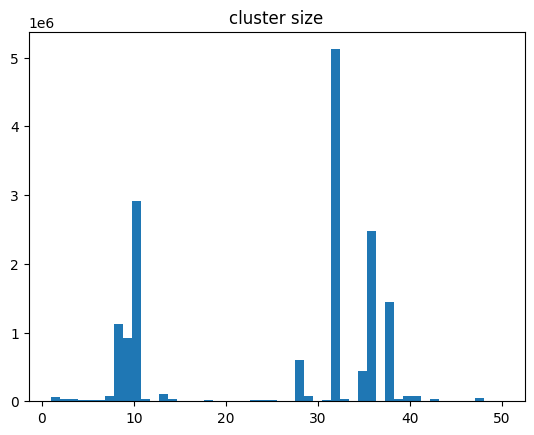

In [18]:
plt.hist(list(norm.cluster) , bins = max(list(norm.cluster)))
plt.title("cluster size")
plt.show()

# Functions

## Matrix Product

In [19]:
def compute_scores(matrix , anno):
    return np.matmul( np.array(anno) , (np.array(matrix)))

## Min Max Normalization

In [20]:
def normalize_rows(arr):
    """
    Normalize each row of a 2D numpy array to the range [0, 1].

    Parameters:
        arr (numpy.ndarray): A 2D numpy array.

    Returns:
        numpy.ndarray: A 2D numpy array with normalized rows.
    """
    if not isinstance(arr, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    if len(arr.shape) != 2:
        raise ValueError("Input array must be 2D.")

    row_min = arr.min(axis=1, keepdims=True)  # Find the minimum value in each row
    row_max = arr.max(axis=1, keepdims=True)  # Find the maximum value in each row

    # Prevent division by zero by ensuring row_max != row_min
    row_range = row_max - row_min
    row_range[row_range == 0] = 1  # Avoid division by zero for constant rows

    normalized = (arr - row_min) / row_range
    return normalized



## RobustScaler Normalization

In [21]:
import numpy as np
from sklearn.preprocessing import RobustScaler

def normalize_rows_with_robust_scaler(matrix , quantile_range = (5 , 95)):
    """
    Normalize each row in the matrix using RobustScaler with quantile range (5, 95).

    Parameters:
    matrix (numpy.ndarray): The input matrix (2D array).

    Returns:
    numpy.ndarray: The normalized matrix.
    """
    if not isinstance(matrix, np.ndarray):
        raise ValueError("Input must be a numpy array.")

    if matrix.ndim != 2:
        raise ValueError("Input must be a 2D matrix.")

    # Initialize RobustScaler with the specified quantile range
    scaler = RobustScaler(quantile_range=quantile_range)

    # Normalize each row individually
    normalized_matrix = np.array([scaler.fit_transform(row.reshape(-1, 1)).flatten() for row in matrix])

    return normalized_matrix

# Example usage
if __name__ == "__main__":
    example_matrix = np.array([
        [10, 20, 30 , 3 , 12 , 9],
        [5, 15, 25 , 1, 2, 3],
        [1, 2, 3 , 0 ,-12 ,122]
    ])

    normalized_matrix = normalize_rows_with_robust_scaler(example_matrix)
    print("Normalized Matrix:")
    print(normalized_matrix)


Normalized Matrix:
[[-0.04347826  0.39130435  0.82608696 -0.34782609  0.04347826 -0.08695652]
 [ 0.04705882  0.51764706  0.98823529 -0.14117647 -0.09411765 -0.04705882]
 [-0.00493827  0.00493827  0.01481481 -0.01481481 -0.13333333  1.19012346]]


## Assign & Expand

In [22]:
def assign(matrix , clusters , celltypes):

    cluster , celltype , score = [] , [] , []
    for i , cl in enumerate(clusters):
        values = matrix[ : , i]
        #print(values.shape , celltypes)
        j = np.argmax(values)
        #print( cl , j , celltypes[j] , values[j] )
        cluster.append(cl)
        celltype.append(celltypes[j])
        score.append(values[j])


    return pd.DataFrame({"cluster" : cluster , "celltype" : celltype , "score" : score})


In [23]:
def expand(assignment , data):
    assign_dict = dict(zip(assignment.cluster , assignment.celltype))
    return [assign_dict[str(x)] for x in data.cluster]

## normalize for number of markers

In [24]:
def norm_marker_number(matrix , anno):
    number_of_markers = np.array(np.array(anno)) != 0
    number_of_markers = np.array(number_of_markers.sum(axis = 1))
    
    return np.array(matrix) / number_of_markers[ : , np.newaxis]

In [25]:
def norm_marker_number_log(matrix , anno):
    number_of_markers = np.array(np.array(anno)) != 0
    number_of_markers = np.array(number_of_markers.sum(axis = 1))
    number_of_markers = 1 + np.log(number_of_markers)
    
    return np.array(matrix) / number_of_markers[ : , np.newaxis]

## custom-norm

In [26]:
def custom_norm(matrix , anno):
    number_of_markers = np.array(np.array(anno)) != 0
    number_of_markers = np.array(number_of_markers.sum(axis = 1))
    df = pd.DataFrame({"cell_type" : anno.index , "marker" : number_of_markers}).sort_values("marker")

    classes = {}
    cur_m = 0
    for idx , row in df.iterrows():
        if cur_m != row.marker:
            classes[row.marker] = [row.cell_type]
            cur_m = row.marker
        else:
            classes[row.marker] = classes[row.marker] + [row.cell_type]
    #print(classes)
    #print(ks)

    m = matrix.copy()

    #print(m)
    for key , value in classes.items():
        #print(key , value)
        temp = m.loc[value]
        #print(temp)
        minimum = np.min(np.array(temp))
        maximum = np.max(np.array(temp))
        m.loc[value] = (np.array(temp) - minimum) / (maximum - minimum)
    #print(m)

    return m

In [27]:
#custom_norm(KS_original , wnm)

## plotting

In [28]:
def generate_column_labels(cluster_names , all_cluster_asignments):
    res = {}
    for x in all_cluster_asignments:
        if str(x) not in res.keys():
            res[str(x)] = 1
        else:
            res[str(x)] = res[str(x)] + 1

    
    total_size = len(all_cluster_asignments)
    
    res_list = []
    for c in cluster_names:
        if str(c) not in res.keys():
            res_list.append(f"{round(0 , 3)}% {c}")
        else:
            res_list.append(f"{round((res[str(c)]/total_size)* 100 , 2)}% {c}")

    return res_list

In [29]:
#generate_column_labels(clusters , list(norm.cluster))

In [30]:
def plot_matrix_with_maxima(matrix, cmap='bwr', figsize=(20, 5), marker='*', marker_color='black',
                             row_labels=None, column_labels=None, title="" , save=False):
    """
    Plots a matrix with an overlay of symbols indicating the maximum value in each column.

    Parameters:
        matrix (ndarray): The input matrix to visualize.
        cmap (str): The colormap to use for the matrix visualization. Default is 'bwr'.
        figsize (tuple): Size of the figure (width, height). Default is (10, 8).
        marker (str): Marker style for the maxima. Default is '*'.
        marker_color (str): Color of the marker for the maxima. Default is 'black'.
        row_labels (list): Labels for the rows. Default is None.
        column_labels (list): Labels for the columns. Default is None.
        title (str): Title of the plot. Default is "Matrix with Maximum Column Values Indicated".
    """
    # Create the plot
    plt.figure(figsize=figsize)
    plt.imshow(matrix, cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Set row and column labels if provided
    if row_labels is not None:
        plt.yticks(ticks=np.arange(len(row_labels)), labels=row_labels)
    if column_labels is not None:
        plt.xticks(ticks=np.arange(len(column_labels)), labels=column_labels , rotation=90)

    # Find the indices of the maximum values in each column
    max_indices = np.argmax(matrix, axis=0)

    # Overlay symbols for the maximum values
    columns = np.arange(matrix.shape[1])  # Column indices
    plt.scatter(columns, max_indices, color=marker_color, marker=marker, label='Max of Column')

    # Add legend (optional, uncomment if needed)
    # plt.legend()

    if save:
        path = "output/plots/" + title.replace(" " , "_") + ".png"
        plt.savefig(path, dpi=600, bbox_inches='tight')


    # Show the plot
    plt.show()

In [31]:
"bla bla".replace(" " , "_")

'bla_bla'

# apply

## KS , original

#### unnormalized

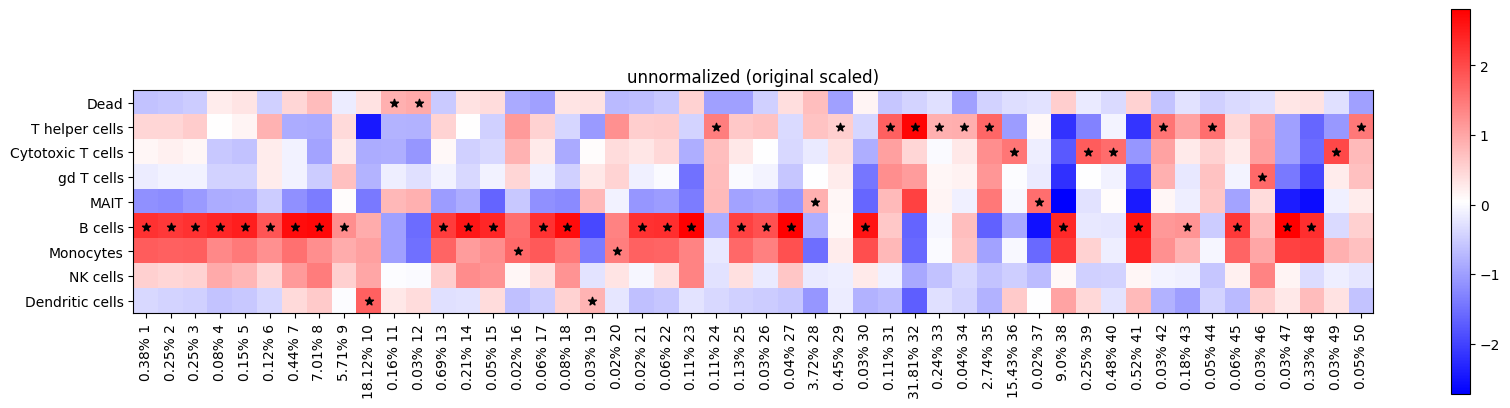

In [32]:
KS_original = compute_scores(np.array(ks) , np.array(wnm))

cl = generate_column_labels(clusters , list(norm.cluster))
plot_matrix_with_maxima(KS_original , row_labels=celltypes , column_labels=cl , title = "unnormalized (original scaled)")

In [33]:
KS_original

array([[-6.28472623e-01, -5.82135427e-01, -5.14039328e-01,
         2.43882516e-01,  3.31240346e-01, -4.58949130e-01,
         4.81331693e-01,  7.71223398e-01, -1.72281700e-01,
         3.61917756e-01,  8.92061593e-01,  9.67855635e-01,
        -5.32829825e-01,  3.62579631e-01,  4.26444904e-01,
        -8.80852303e-01, -9.89566529e-01,  3.33077821e-01,
         3.60355244e-01, -7.02227131e-01, -6.56977380e-01,
        -5.55246633e-01,  5.22228931e-01, -9.91571524e-01,
        -9.90219966e-01, -4.72724153e-01,  3.86570876e-01,
         7.48720672e-01, -9.94100427e-01,  1.51175946e-01,
        -5.82678149e-01, -4.20695222e-01, -2.98231924e-01,
        -9.88942545e-01, -4.43712300e-01, -3.23350547e-01,
        -2.82512055e-01,  5.68571682e-01, -1.90506771e-01,
        -3.52234129e-01,  5.25754537e-01, -5.88550823e-01,
        -2.73793269e-01, -4.67517476e-01, -3.60666690e-01,
        -2.90534461e-01,  3.12675863e-01,  3.43971352e-01,
        -2.87374212e-01, -9.87245043e-01],
       [ 4.74

In [34]:
ks

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
LD,-0.628473,-0.582135,-0.514039,0.243883,0.331240,-0.458949,0.481332,0.771223,-0.172282,0.361918,...,0.525755,-0.588551,-0.273793,-0.467517,-0.360667,-0.290534,0.312676,0.343971,-0.287374,-0.987245
CD3,-0.995939,-0.896659,-0.890016,-0.601981,-0.531777,-0.793711,-0.604995,-0.776714,-0.267047,-0.263369,...,-0.514753,-0.544945,-0.249047,-0.408739,-0.722325,-0.645863,-0.745876,-0.655129,-0.209998,-0.608345
CD4,-0.756254,-0.779201,-0.761518,-0.568868,-0.599559,-0.567362,-0.972505,-0.557502,-0.527631,-0.424116,...,-0.976086,-0.665100,-0.417464,0.245393,-0.833564,-0.562494,-0.787576,-0.568521,-0.968944,-0.266548
CD8,-0.925123,-0.921215,-0.989674,-0.861902,-0.988855,-0.877020,-0.601502,-0.593878,-0.614393,0.376024,...,-0.445498,-0.911781,-0.803373,-0.287847,-0.934824,-0.537295,-0.794281,-0.536739,0.575589,-0.624902
GDTCR,-0.470893,-0.452488,-0.453168,-0.192218,-0.211101,-0.315569,0.378577,0.394355,0.366929,0.874659,...,-0.225883,-0.392593,-0.849876,-0.368990,-0.441132,0.581010,-0.405342,-0.370109,-0.228530,-0.422766
VA72,-0.556918,-0.553484,-0.536243,-0.156139,-0.185635,-0.383564,-0.198070,-0.098796,-0.054658,0.474932,...,-0.288273,-0.435634,-0.278826,-0.261283,-0.496783,-0.135488,-0.451408,-0.382420,-0.203747,-0.314213
CD19,-0.415434,-0.402662,-0.394976,0.351614,0.350497,-0.360638,0.479040,0.790731,-0.148476,0.635928,...,0.636707,-0.958476,-0.267514,-0.965484,-0.320973,-0.960983,0.477072,0.546482,-0.963130,-0.961245
CD14,-0.886206,-0.844390,-0.852267,-0.702622,-0.647134,-0.992182,-0.601756,-0.660407,-0.470215,0.747889,...,0.465499,-0.879195,-0.625028,-0.513330,-0.769527,-0.744837,-0.239518,0.387825,0.289667,-0.787474
CD56,-0.452966,-0.415015,-0.357845,0.352401,0.302774,-0.316523,0.533121,0.679724,0.271547,0.729718,...,-0.378741,-0.617601,-0.369848,-0.991148,-0.510578,0.728864,-0.588715,-0.993278,-0.351603,-0.828743
CD161,-0.898565,-0.992660,-0.873238,-0.446118,-0.416516,-0.694324,-0.489904,-0.369863,-0.218848,-0.233817,...,-0.538095,-0.717444,-0.517772,-0.152351,-0.811773,-0.502835,-0.988155,-0.613701,-0.377699,-0.571268


In [35]:
KS_original[ 1 , 0]

np.float64(0.47456909782553175)

In [36]:
unnorm = assign(KS_original , clusters=clusters , celltypes=celltypes)
unnorm = expand( unnorm , norm )
#plot_sankey(mg , unnorm)

#### number of markers normalized

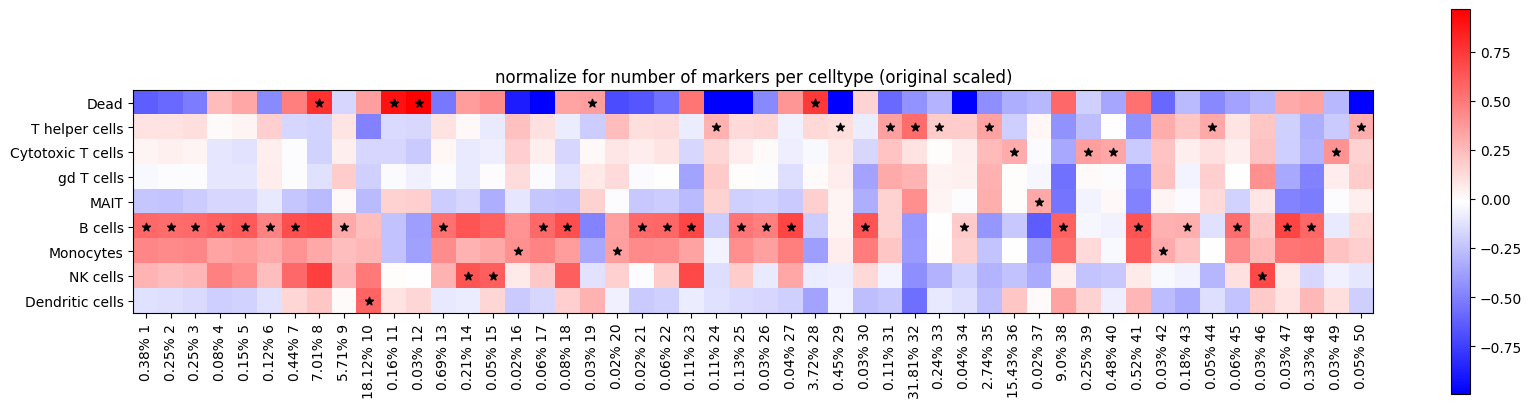

In [37]:
KS_original2 = norm_marker_number(KS_original , np.array(wnm))

cl = generate_column_labels(clusters , list(norm.cluster))
plot_matrix_with_maxima(KS_original2 , row_labels=celltypes , column_labels=cl , title = "normalize for number of markers per celltype (original scaled)")

In [38]:
KS_original2 = assign(KS_original2 , clusters=clusters , celltypes=celltypes)
KS_original2 = expand( KS_original2 , norm )

#plot_sankey(mg , KS_original2)

#### custom norm

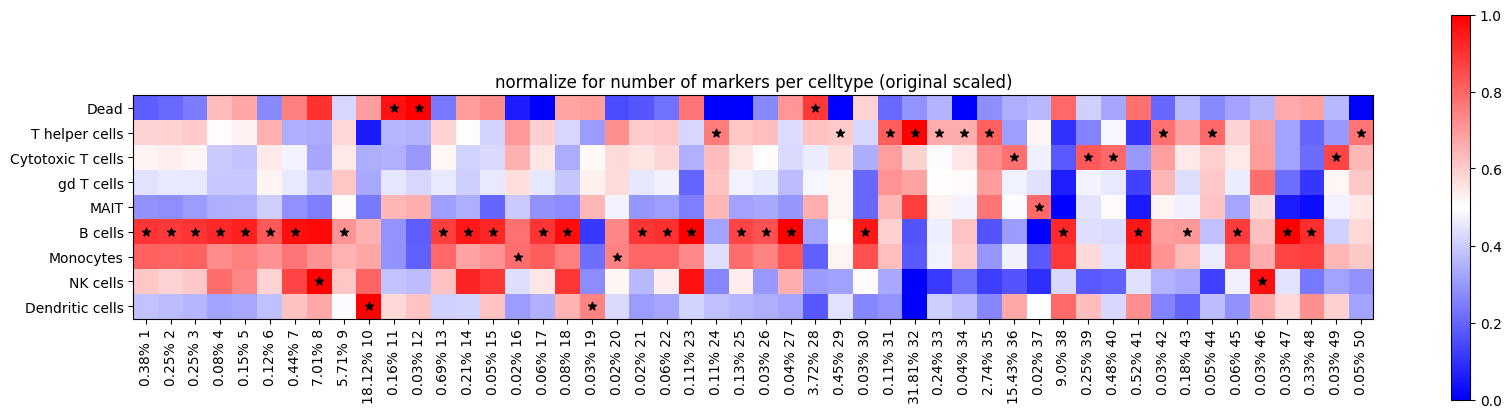

In [39]:
df = pd.DataFrame(KS_original)
df.index = celltypes
df.columns = clusters

KS_original_cn = custom_norm(df , wnm)

plot_matrix_with_maxima(KS_original_cn , row_labels=celltypes , column_labels=cl , title = "normalize for number of markers per celltype (original scaled)")

In [40]:
KS_original_cn = np.array(KS_original_cn)

In [41]:
KS_original_cn = assign(KS_original_cn , clusters=clusters , celltypes=celltypes)
KS_original_cn = expand( KS_original_cn , norm )

#plot_sankey(mg , KS_original_cn)

#### log number of markers norm

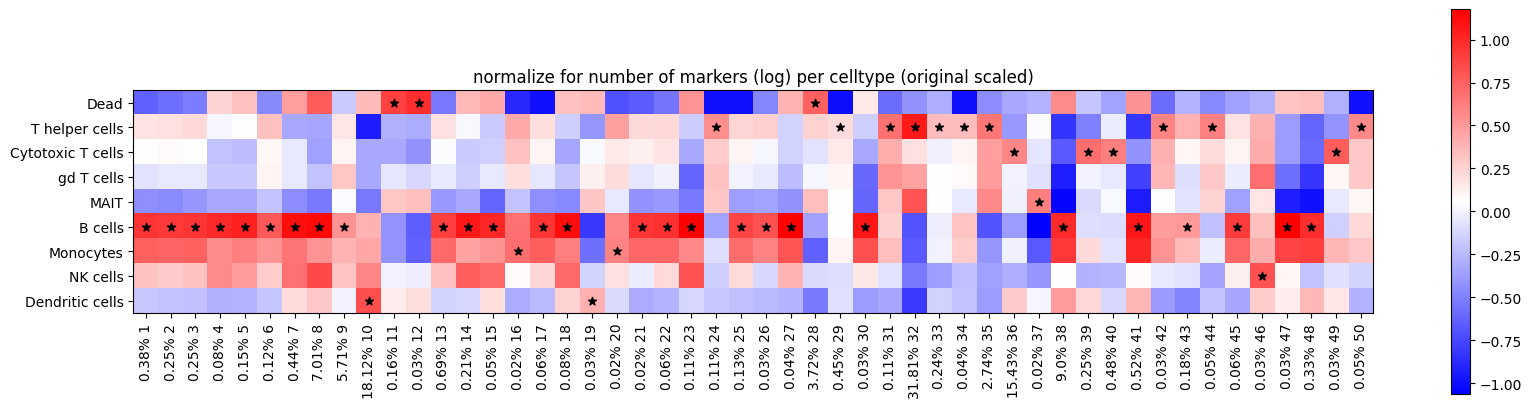

In [42]:
KS_original_log = norm_marker_number_log(KS_original , np.array(wnm))

plot_matrix_with_maxima(KS_original_log , row_labels=celltypes , column_labels=cl , title = "normalize for number of markers (log) per celltype (original scaled)")

In [43]:
KS_original_log = assign(KS_original_log , clusters=clusters , celltypes=celltypes)
KS_original_log = expand( KS_original_log , norm )

#plot_sankey(mg , KS_original_log)

In [44]:
#plot_sankey(mg , KS_original_log)

#### (1 , 99)

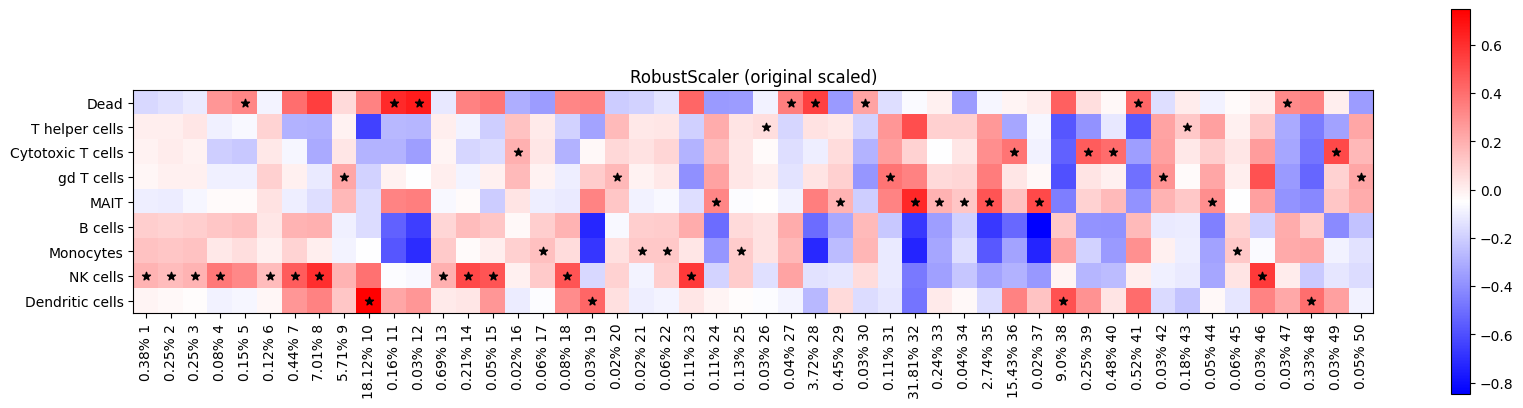

In [45]:
KS_original_robust = normalize_rows_with_robust_scaler(KS_original , quantile_range = (1,99))

plot_matrix_with_maxima(KS_original_robust , row_labels=celltypes , column_labels=cl , title = "RobustScaler (original scaled)")

KS_original_robust = assign(KS_original_robust , clusters=clusters , celltypes=celltypes)
KS_original_robust = expand( KS_original_robust , norm )

In [46]:
#plot_sankey(mg , KS_original_robust)

#### (10 , 90)

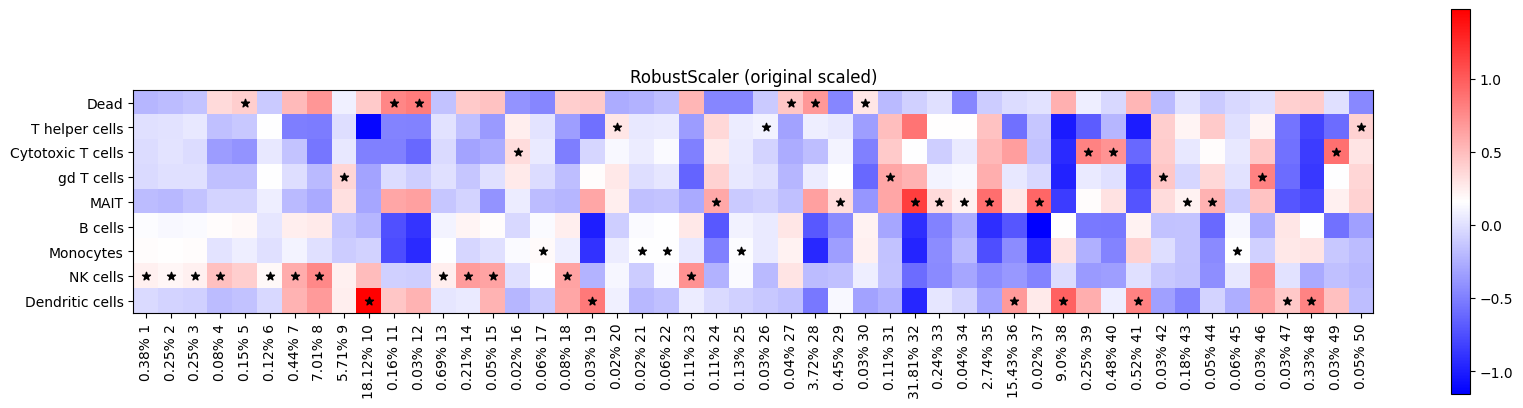

In [47]:
KS_original_robust = normalize_rows_with_robust_scaler(KS_original , quantile_range = (10,90))

plot_matrix_with_maxima(KS_original_robust , row_labels=celltypes , column_labels=cl , title = "RobustScaler (original scaled)")

KS_original_robust = assign(KS_original_robust , clusters=clusters , celltypes=celltypes)
KS_original_robust = expand( KS_original_robust , norm )

In [48]:
#plot_sankey(mg , KS_original_robust)

#### (25 , 75)

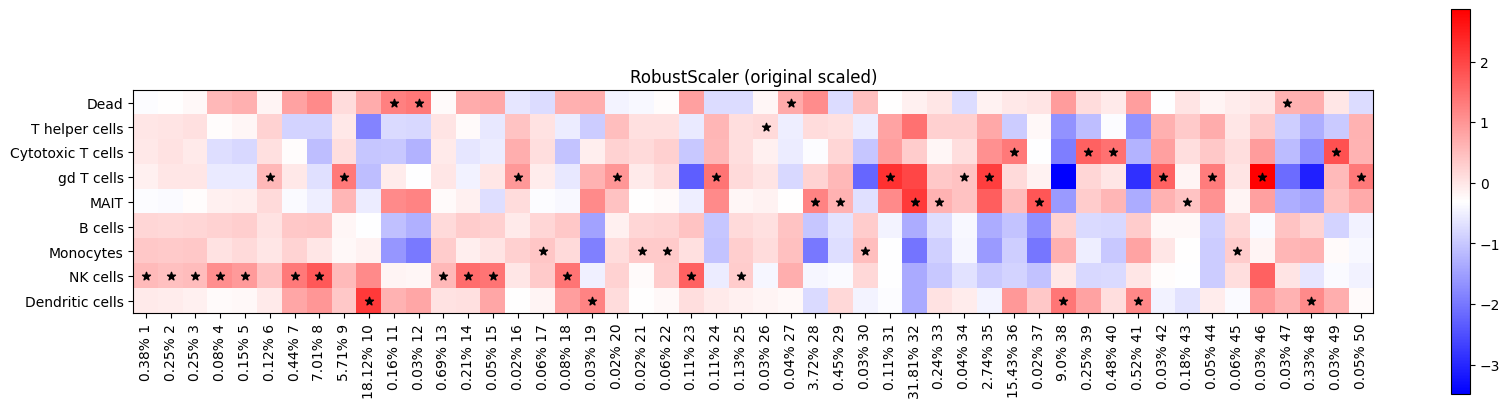

In [49]:
KS_original_robust = normalize_rows_with_robust_scaler(KS_original , quantile_range = (25,75))

plot_matrix_with_maxima(KS_original_robust , row_labels=celltypes , column_labels=cl , title = "RobustScaler (original scaled)")

KS_original_robust = assign(KS_original_robust , clusters=clusters , celltypes=celltypes)
KS_original_robust = expand( KS_original_robust , norm )

In [50]:
#plot_sankey(mg , KS_original_robust)

#### (5, 95)

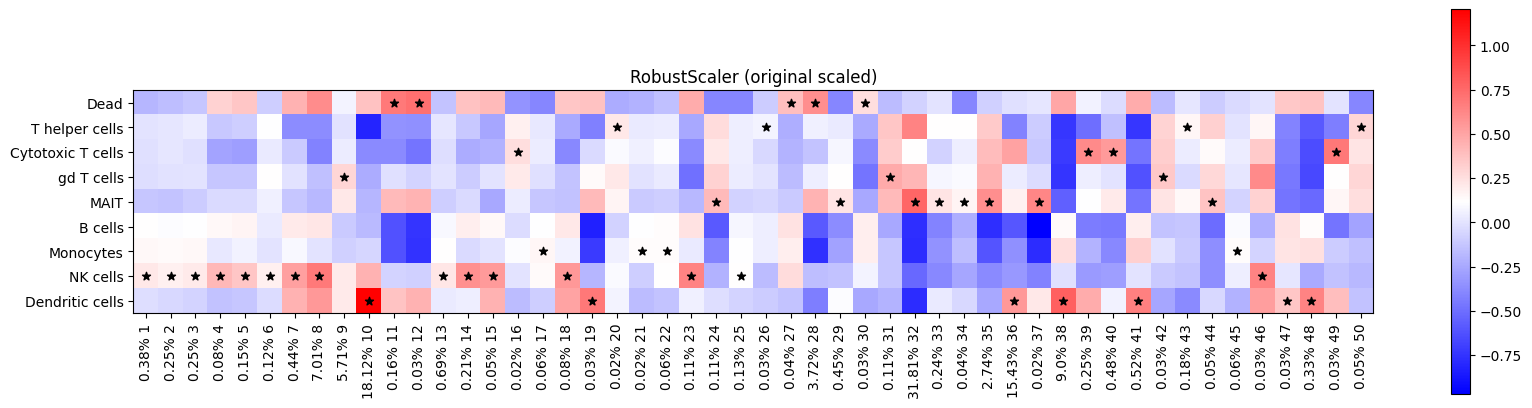

In [51]:
KS_original_robust = normalize_rows_with_robust_scaler(KS_original , quantile_range = (5,95))

plot_matrix_with_maxima(KS_original_robust , row_labels=celltypes , column_labels=cl , title = "RobustScaler (original scaled)")

KS_original_robust = assign(KS_original_robust , clusters=clusters , celltypes=celltypes)
KS_original_robust = expand( KS_original_robust , norm )

In [52]:
#plot_sankey(mg , KS_original_robust)

#### min-max

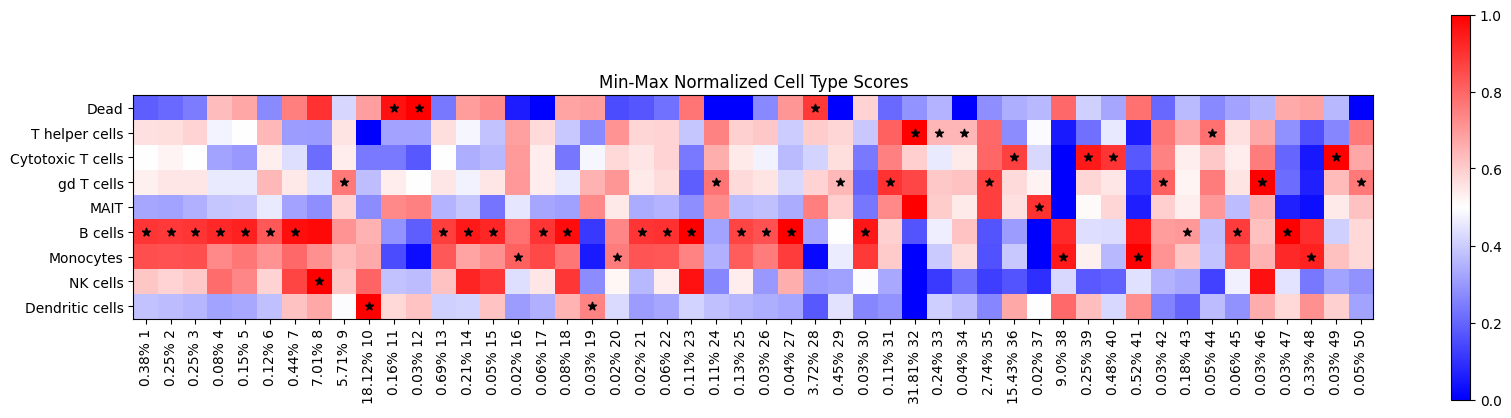

In [53]:
KS_original = normalize_rows(KS_original)

plot_matrix_with_maxima(KS_original , row_labels=celltypes , column_labels=cl , title = "Min-Max Normalized Cell Type Scores" , save = True)#title="min-max normalization per celltype (original scaled)")

In [52]:
#KS_original[ : , 31]

In [53]:
KS_original = assign(KS_original , clusters=clusters , celltypes=celltypes)
KS_original = expand( KS_original , norm )



In [54]:
#plot_sankey(mg , KS_original)

## KS , major

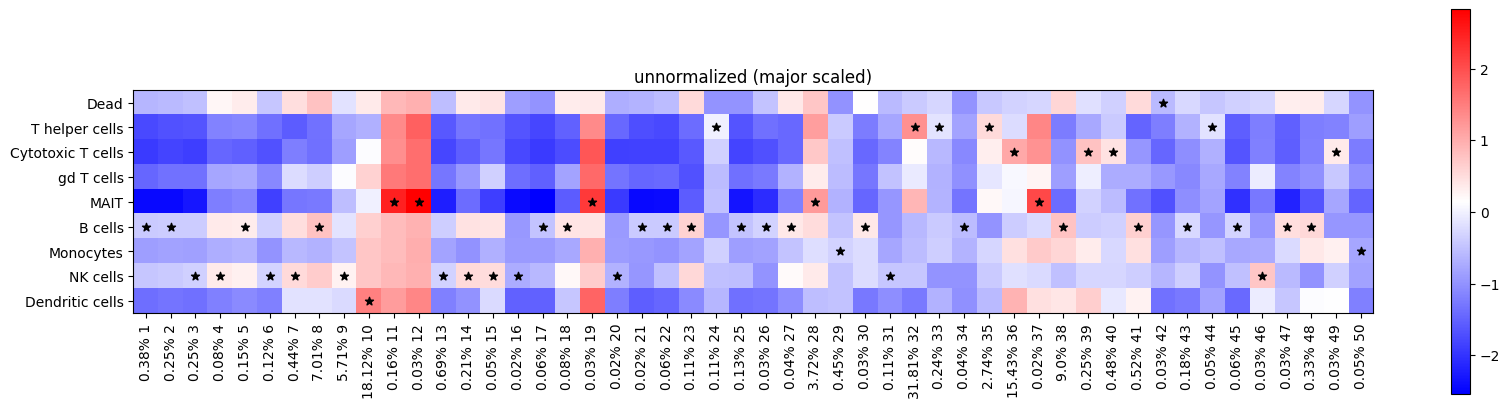

In [55]:
KS_major = compute_scores(np.array(ks) , np.array(mct))

plot_matrix_with_maxima(KS_major , row_labels=celltypes , column_labels=cl , title = "unnormalized (major scaled)")

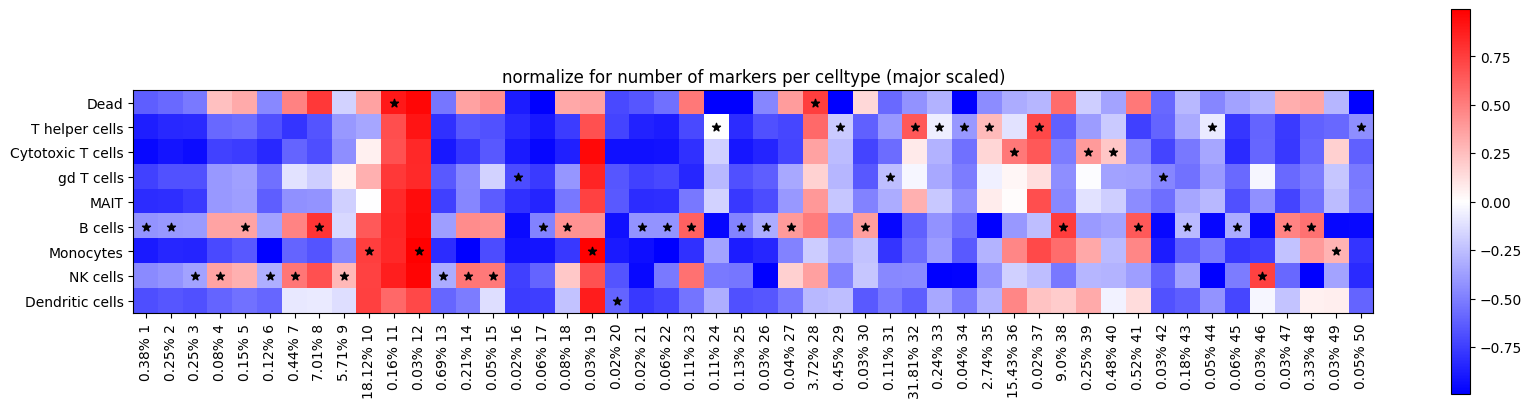

In [56]:
KS_major2 = norm_marker_number(KS_major , np.array(mct))

plot_matrix_with_maxima(KS_major2 , row_labels=celltypes , column_labels=cl , title = "normalize for number of markers per celltype (major scaled)")

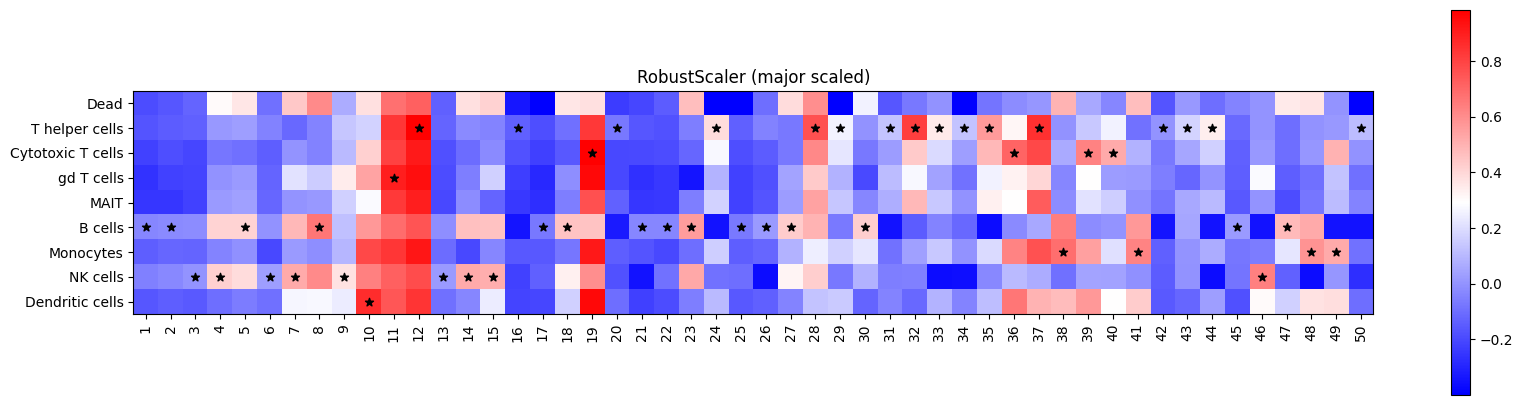

In [57]:
KS_major_robust = normalize_rows_with_robust_scaler(KS_major)

plot_matrix_with_maxima(KS_major_robust , row_labels=celltypes , column_labels=clusters , title = "RobustScaler (major scaled)")

KS_major_robust = assign(KS_major_robust , clusters=clusters , celltypes=cl)
KS_major_robust = expand( KS_major_robust , norm )

In [58]:
#plot_sankey(mg , KS_major_robust)

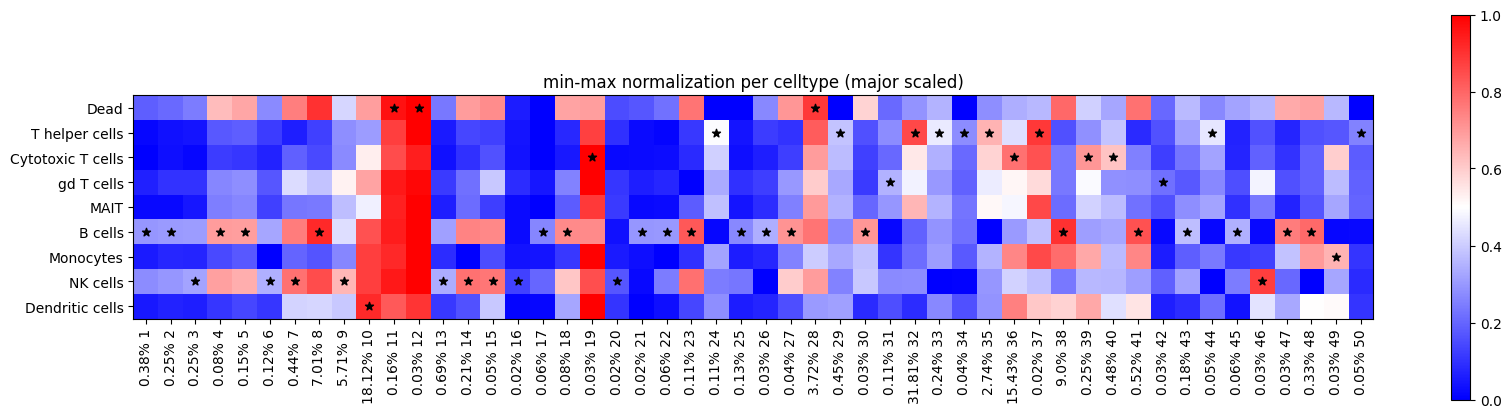

In [59]:
KS_major = normalize_rows(KS_major)

plot_matrix_with_maxima(KS_major , row_labels=celltypes , column_labels=cl , title="min-max normalization per celltype (major scaled)")

In [60]:
KS_major = assign(KS_major , clusters=clusters , celltypes=celltypes)
KS_major = expand(KS_major , norm )


In [61]:
#plot_sankey(mg , KS_major)

## EMD , original

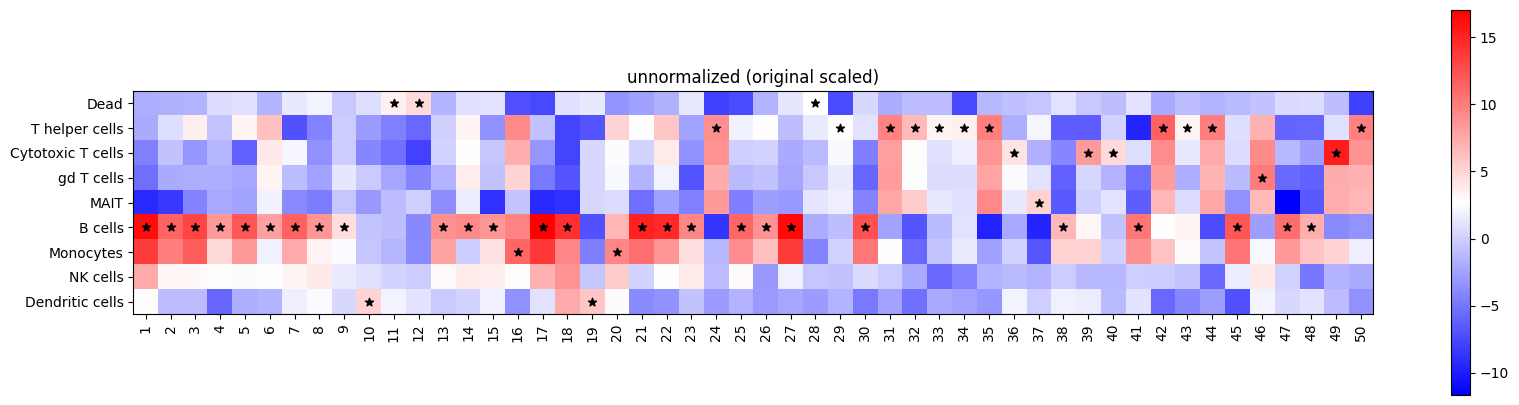

In [62]:
EMD_original = compute_scores(np.array(emd) , np.array(wnm))

plot_matrix_with_maxima(EMD_original , row_labels=celltypes , column_labels=clusters , title = "unnormalized (original scaled)")

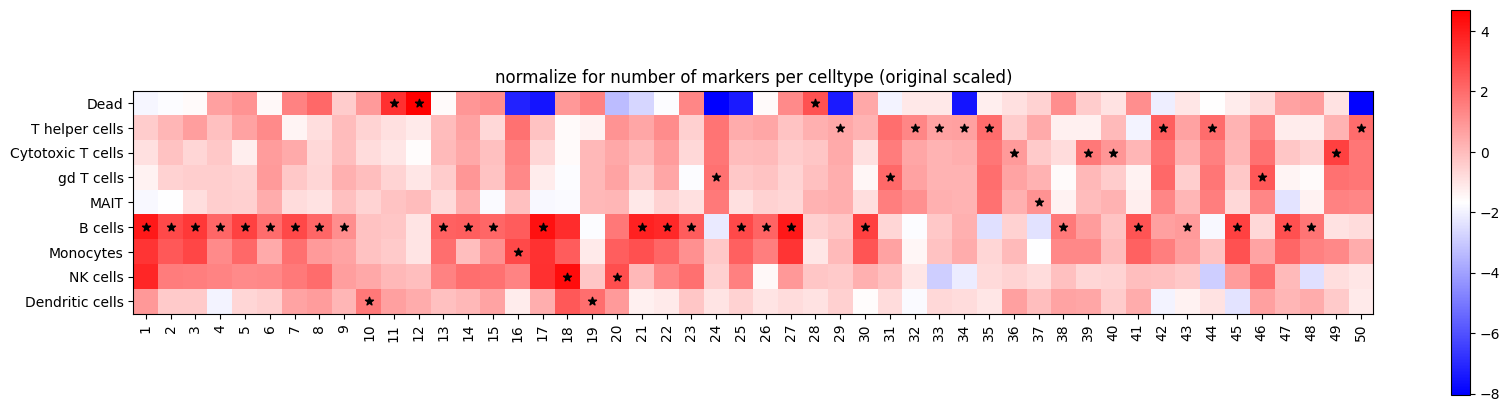

In [63]:
EMD_original2 = norm_marker_number(EMD_original , np.array(wnm))

plot_matrix_with_maxima(EMD_original2 , row_labels=celltypes , column_labels=clusters , title = "normalize for number of markers per celltype (original scaled)")

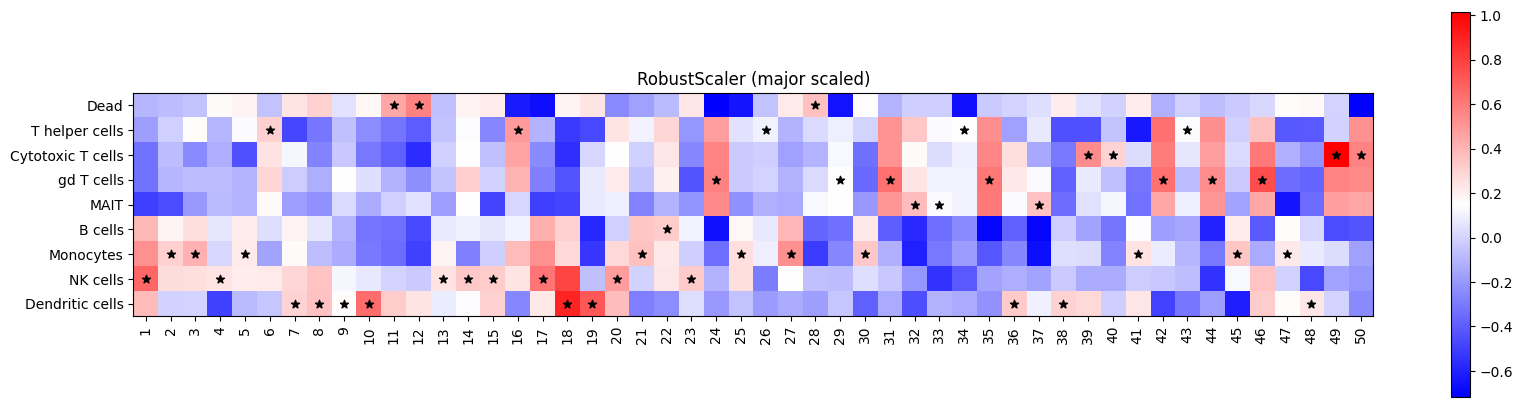

In [64]:
EMD_original_robust = normalize_rows_with_robust_scaler(EMD_original)

plot_matrix_with_maxima(EMD_original_robust , row_labels=celltypes , column_labels=clusters , title = "RobustScaler (major scaled)")

EMD_original_robust = assign(EMD_original_robust , clusters=clusters , celltypes=celltypes)
EMD_original_robust = expand( EMD_original_robust , norm )

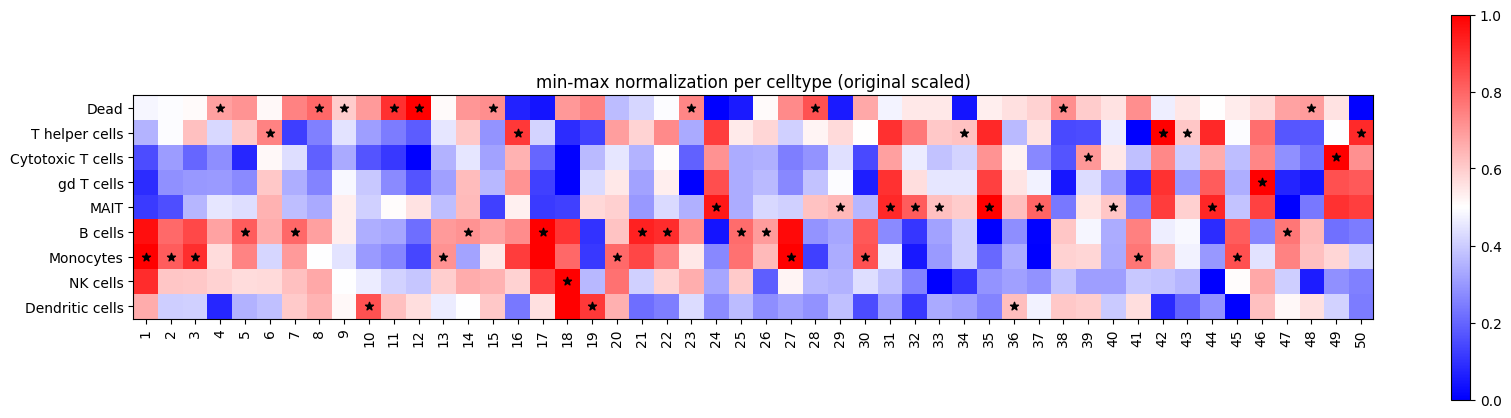

In [65]:
EMD_original = normalize_rows(EMD_original)

plot_matrix_with_maxima(EMD_original , row_labels=celltypes , column_labels=clusters , title="min-max normalization per celltype (original scaled)")

In [66]:
EMD_original = assign( EMD_original , clusters=clusters , celltypes=celltypes)
EMD_original = expand( EMD_original , norm )


## EMD , major

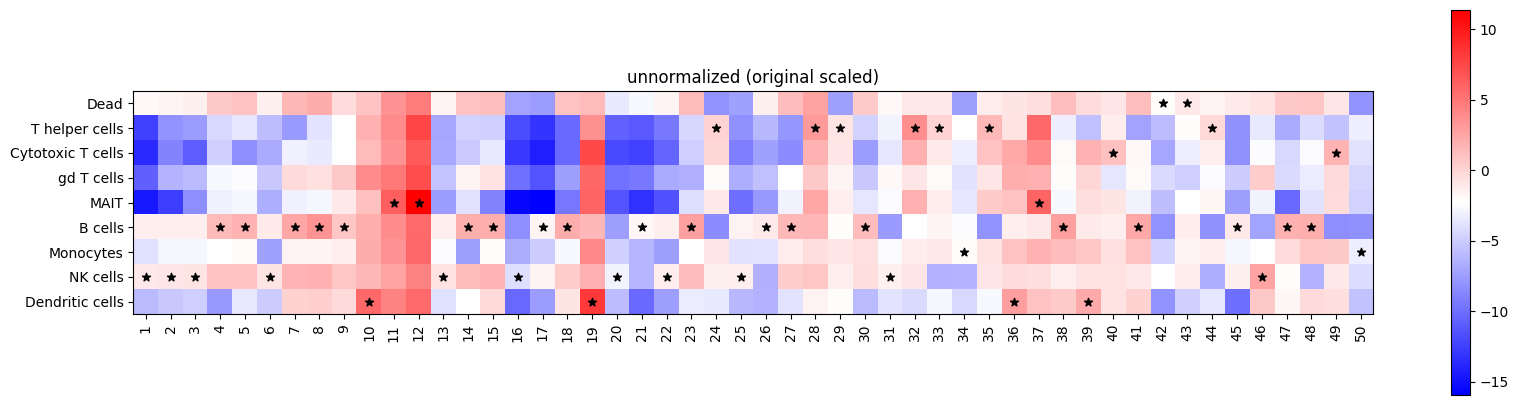

In [67]:
EMD_major = compute_scores(np.array(emd) , np.array(mct))

plot_matrix_with_maxima(EMD_major , row_labels=celltypes , column_labels=clusters , title = "unnormalized (original scaled)")

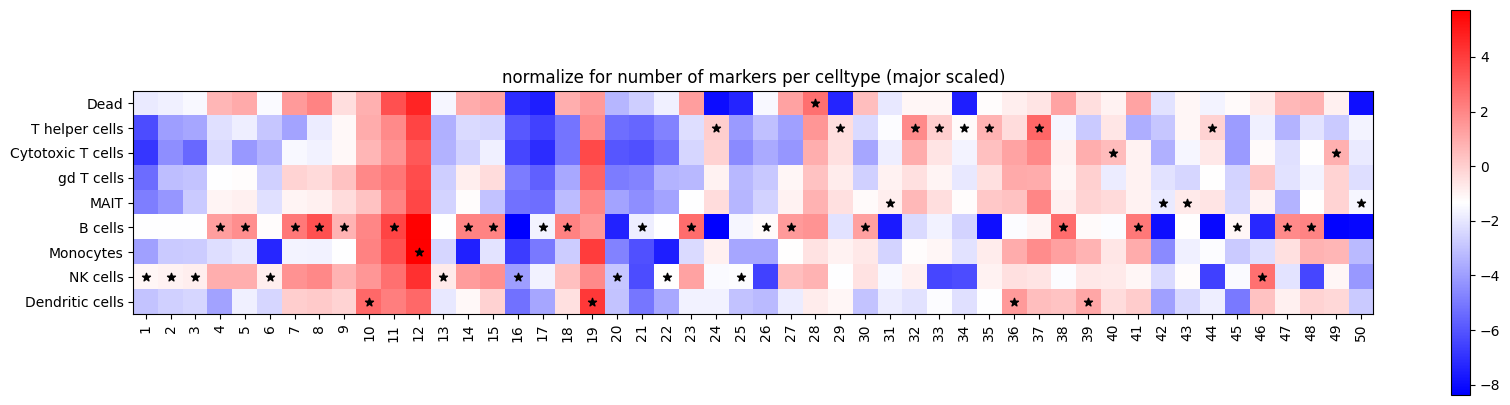

In [68]:
EMD_major2 = norm_marker_number(EMD_major , np.array(mct))

plot_matrix_with_maxima(EMD_major2 , row_labels=celltypes , column_labels=clusters , title = "normalize for number of markers per celltype (major scaled)")

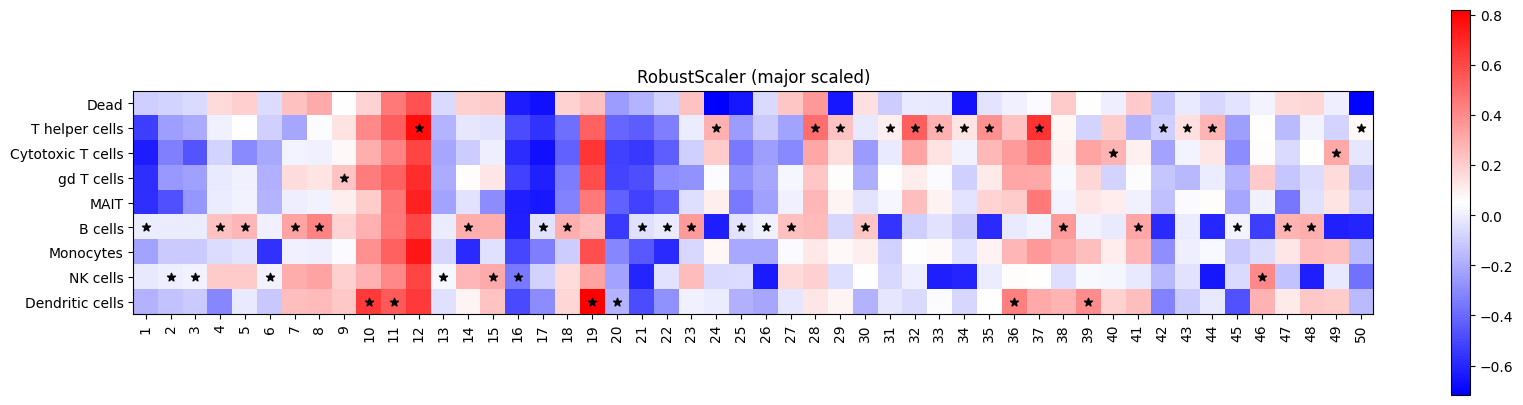

In [69]:
EMD_major_robust = normalize_rows_with_robust_scaler(EMD_major)

plot_matrix_with_maxima(EMD_major_robust , row_labels=celltypes , column_labels=clusters , title = "RobustScaler (major scaled)")

EMD_major_robust = assign(EMD_major_robust , clusters=clusters , celltypes=celltypes)
EMD_major_robust = expand( EMD_major_robust , norm )

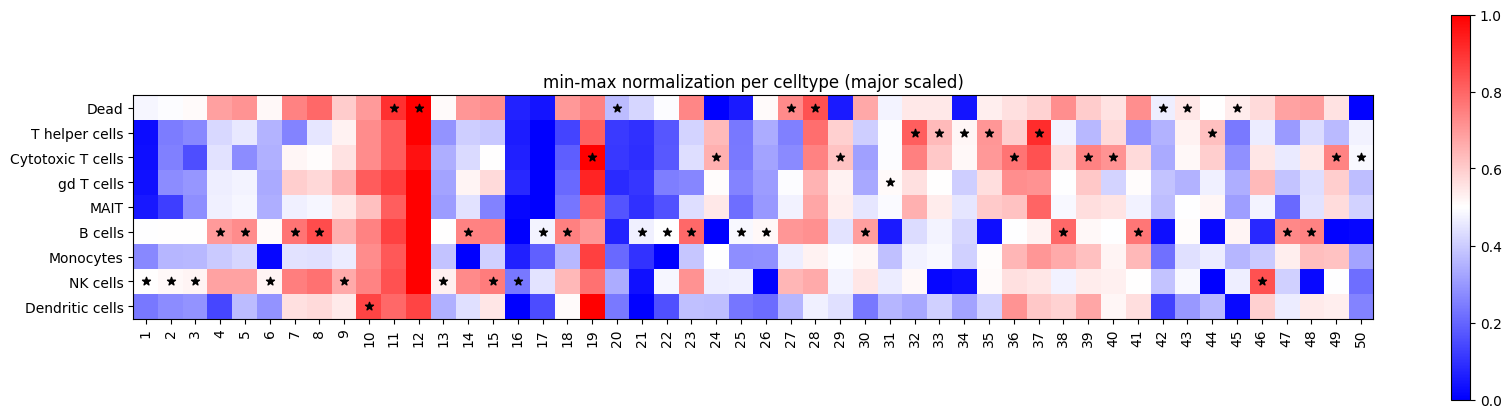

In [70]:
EMD_major = normalize_rows(EMD_major)

plot_matrix_with_maxima(EMD_major , row_labels=celltypes , column_labels=clusters , title="min-max normalization per celltype (major scaled)")

In [71]:
EMD_major = assign( EMD_major , clusters=clusters , celltypes=celltypes)
EMD_major = expand( EMD_major , norm )

## no dead cells predicted

In [72]:
#no_dead_wnm_ks = compute_scores(np.array(ks) , np.array(no_dead))
#plot_matrix_with_maxima(no_dead_wnm_ks , row_labels=list(no_dead.index) , column_labels=clusters , title = "unnormalized (original scaled)")

In [73]:
#no_dead_wnm_ks_robust = normalize_rows_with_robust_scaler(no_dead_wnm_ks)

#plot_matrix_with_maxima(no_dead_wnm_ks_robust , row_labels=list(no_dead.index) , column_labels=clusters , title = "RobustScaler (major scaled)")

#no_dead_wnm_ks_robust = assign(no_dead_wnm_ks_robust , clusters=clusters , celltypes=list(no_dead.index))
#no_dead_wnm_ks_robust = expand( no_dead_wnm_ks_robust , norm )

In [74]:
#plot_sankey(mg , no_dead_wnm_ks_robust)

In [75]:
#no_dead_wnm_ks = normalize_rows(no_dead_wnm_ks)
#plot_matrix_with_maxima(no_dead_wnm_ks , row_labels=list(no_dead.index) , column_labels=clusters , title="min-max normalization per celltype (major scaled)")

In [76]:
#no_dead_wnm_ks = assign(no_dead_wnm_ks , clusters=clusters , celltypes=list(no_dead.index))
#no_dead_wnm_ks = expand( no_dead_wnm_ks , norm )

#plot_sankey(mg , no_dead_wnm_ks)

# adjust celltype names

In [77]:
from tqdm import tqdm

In [78]:
for idx , row in tqdm(mapping_df.iterrows()):
    #print(str(row.sce_label) , str(row.matrix_label))
    if str(row.sce_label) != "nan":
        mg = replace_string_in_vector(mg , row.sce_label , row.label)
    if str(row.matrix_label) != "nan":
        KS_original = replace_string_in_vector(KS_original , row.matrix_label , row.label)
        KS_major = replace_string_in_vector(KS_major , row.matrix_label , row.label)
        EMD_original= replace_string_in_vector(EMD_original, row.matrix_label , row.label)
        EMD_major   = replace_string_in_vector(EMD_major   , row.matrix_label , row.label)

0it [00:00, ?it/s]

16it [01:37,  6.10s/it]


# Sankey plot

## KS , original , min-max

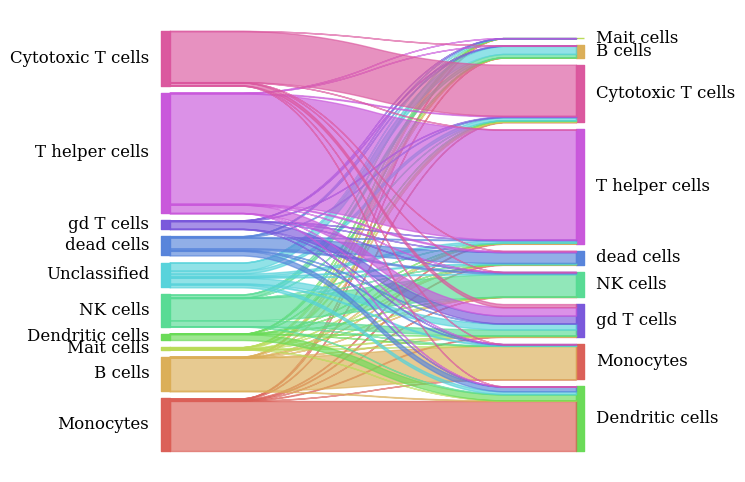

In [79]:
plot_sankey(mg , KS_original)

## KS , original , RobustScaler

In [80]:
#plot_sankey(mg , KS_original_robust)

## KS , major

In [81]:
#plot_sankey(mg , KS_major)

## KS , major , RobustScaler

In [82]:
#plot_sankey(mg , KS_major_robust)

## EMD , original

In [83]:
#plot_sankey(mg , EMD_original)

## EMD , original , robust

In [84]:
#plot_sankey(mg , EMD_original_robust)

## EMD , major

In [85]:
#plot_sankey(mg , EMD_major)

## EMD , major , robust

In [86]:
#plot_sankey(mg , EMD_major_robust)

# export vectors

In [87]:
pd.DataFrame({"Celltype" : KS_original}).to_csv(f"data/{scale}/KS_sce_{scale}_original.csv")
pd.DataFrame({"Celltype" : KS_major}).to_csv(f"data/{scale}/KS_sce_{scale}_main.csv")
pd.DataFrame({"Celltype" : EMD_original}).to_csv(f"data/{scale}/EMD_sce_{scale}_original.csv")
pd.DataFrame({"Celltype" : EMD_major}).to_csv(f"data/{scale}/EMD_sce_{scale}_main.csv")
